In [1]:
# Import the required libraries and dependencies
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt

In [2]:
# Create path to CSV file
csv_path = "Metro_Interstate_Traffic_Volume.csv"
# Import the CSV into a pandas DataFrame
df = pd.read_csv(csv_path)

In [3]:
# Convert 'date_time' column to datetime data type
# and reset index
df['date_time'] = pd.to_datetime(df['date_time'])
df.set_index('date_time', inplace=True)
df.sort_index(inplace=True)

In [4]:
df.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,traffic_volume
date_time,,,,,,,,
2012-10-02 09:00:00,NaN,288.28,0.0,0.0,40,Clouds,scattered clouds,5545
2012-10-02 10:00:00,NaN,289.36,0.0,0.0,75,Clouds,broken clouds,4516
2012-10-02 11:00:00,NaN,289.58,0.0,0.0,90,Clouds,overcast clouds,4767
2012-10-02 12:00:00,NaN,290.13,0.0,0.0,90,Clouds,overcast clouds,5026
2012-10-02 13:00:00,NaN,291.14,0.0,0.0,75,Clouds,broken clouds,4918


In [5]:
#The 'date_time' column entry is the top of the hour for each row.  Holidays
#are denoted in the 'holiday' column, but are only noted for the first hour of that day
#at 00:00:00 (midnight), and the rest of the rows say "None" for that day, despite taking
#place during the holiday

# Forward fill the holiday column to propagate the holiday information for all hours of the day
df['holiday'] = df.groupby(df.index.date)['holiday'].ffill()


In [23]:
# Extract year from the datetime index and add 'year' column
df['year'] = df.index.year
# Calculate the day of the week (0 = Monday, 1 = Tuesday, ..., 6 = Sunday)
df['day_of_week'] = df.index.weekday

# Group the data by year and holiday, and calculate the average traffic volume
average_holiday_volume_by_year = df.groupby(['year', 'holiday'])['traffic_volume'].mean()

core_holiday = ['Christmas Day', 'Independence Day', 'Labor Day', 'Memorial Day', 'New Years Day', 'Thanksgiving Day']
core_holiday_data = df[df['holiday'].isin(core_holiday)]
# Calculate the average traffic volume for each holiday
core_holiday_avg_traffic = core_holiday_data.groupby('holiday')['traffic_volume'].mean()

# Group the data by day of the week and calculate the average traffic volume
average_traffic_by_day_of_week = df.groupby('day_of_week')['traffic_volume'].mean()
# Define a dictionary to map numeric representation of days to their names
day_mapping = {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'}
# Replace the numeric representation of days with their names
average_traffic_by_day_of_week.index = average_traffic_by_day_of_week.index.map(day_mapping)


In [18]:
#average_holiday_volume_by_year

#average_traffic_by_day_of_week

#core_holiday_avg_traffic

holiday
Christmas Day       1739.145038
Independence Day    2177.801587
Labor Day           2195.331210
Memorial Day        2085.649254
New Years Day       1924.595420
Name: traffic_volume, dtype: float64

In [8]:
# Group the data by holiday and calculate the overall average traffic volume for each holiday
overall_holiday_average = average_holiday_volume_by_year.groupby('holiday').mean()

# Display the result
print(overall_holiday_average)

holiday
Christmas Day                1735.638407
Columbus Day                 3454.577767
Independence Day             2183.695000
Labor Day                    2258.287092
Martin Luther King Jr Day    2726.546509
Memorial Day                 2091.891094
New Years Day                1847.484205
State Fair                   3832.456725
Thanksgiving Day             2072.075151
Veterans Day                 3263.422058
Washingtons Birthday         2892.695299
Name: traffic_volume, dtype: float64


Text(0, 2678.0699369250615, 'Average: 2578.07')

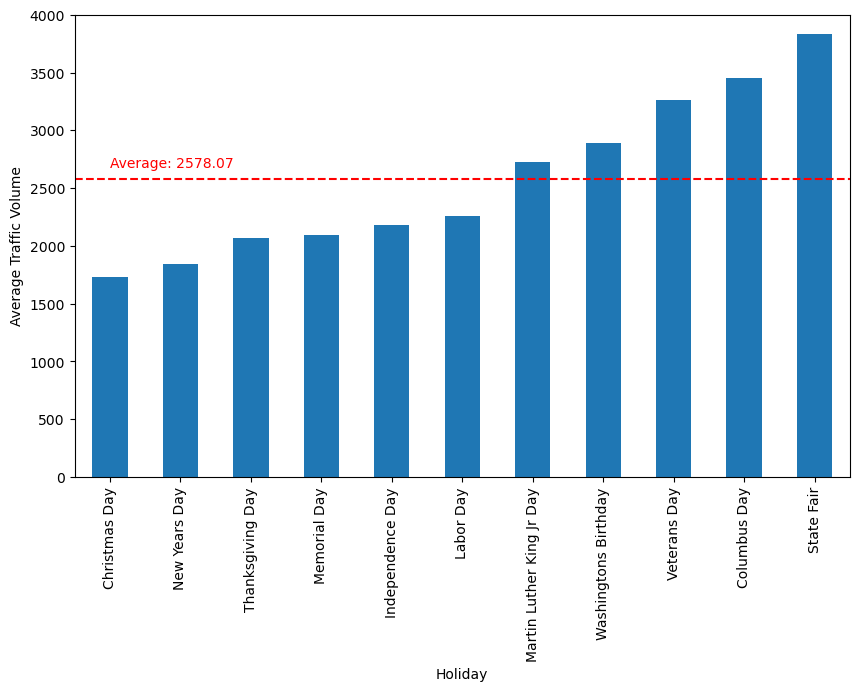

In [27]:
# Sort the overall_holiday_average DataFrame by traffic volume
overall_holiday_average_sorted = overall_holiday_average.sort_values()
# Calculate the overall average traffic volume for each holiday
overall_average_traffic = overall_holiday_average_sorted.mean()
# Plot the overall average traffic volume for each holiday
ax1 = overall_holiday_average_sorted.plot(kind='bar', figsize=(10, 6), ylabel='Average Traffic Volume', xlabel='Holiday', ylim=(0, 4000))
# Draw a horizontal line indicating the overall average traffic volume
ax1.axhline(y=overall_average_traffic, color='r', linestyle='--')
ax1.text(0, overall_average_traffic + 100, f'Average: {overall_average_traffic:.2f}', color='r')

Text(0, 2821.1132248933122, 'Weekend Average: 2571.11')

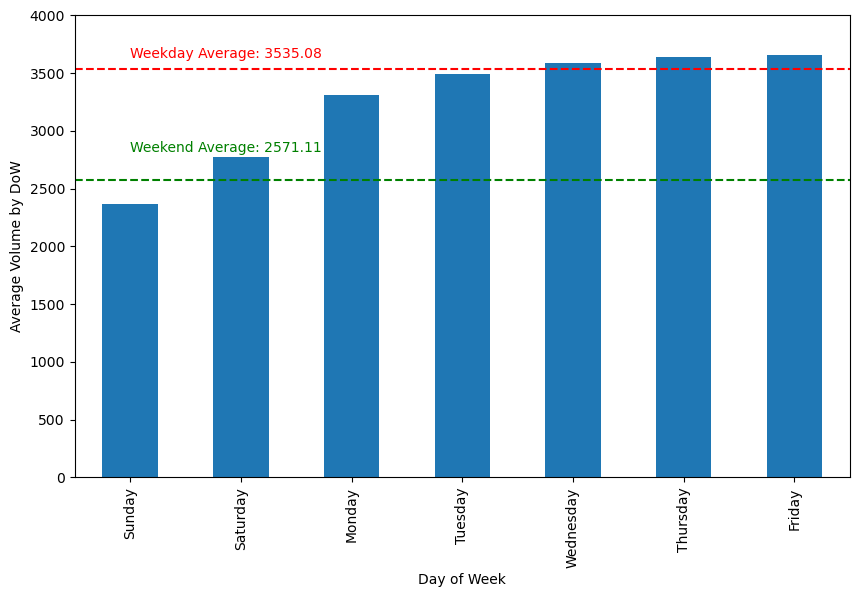

In [36]:

# # Sort the average_traffic_by_day_of_week DataFrame by traffic volume
average_traffic_by_day_of_week_sorted = average_traffic_by_day_of_week.sort_values()
# overall_average_dow_traffic = average_traffic_by_day_of_week_sorted.mean()
# ax2 = average_traffic_by_day_of_week_sorted.plot(kind='bar', figsize=(10, 6), ylabel='Average Traffice Volume', xlabel='Day of Week', ylim=(0, 4000))

# # Draw a horizontal line indicating the overall average traffic volume by day of the week
# ax2.axhline(y=overall_average_dow_traffic, color='r', linestyle='--')

# # Add a text label to the horizontal line
# ax2.text(0, overall_average_dow_traffic + 100, f'Average: {overall_average_dow_traffic:.2f}', color='r')

# Calculate the average traffic volume for weekdays (Monday to Friday)
average_traffic_weekdays = average_traffic_by_day_of_week_sorted.loc['Monday':'Friday'].mean()

# Calculate the average traffic volume for weekends (Saturday and Sunday)
average_traffic_weekends = average_traffic_by_day_of_week_sorted.loc[['Saturday', 'Sunday']].mean()

# Plot the average traffic volume by day of the week
ax = average_traffic_by_day_of_week_sorted.plot(kind='bar', figsize=(10, 6), ylabel='Average Volume by DoW', xlabel='Day of Week', ylim=(0, 4000))

# Draw a horizontal line indicating the average traffic volume for weekdays
ax.axhline(y=average_traffic_weekdays, color='r', linestyle='--')

# Add a text label to the weekday horizontal line
ax.text(0, average_traffic_weekdays + 100, f'Weekday Average: {average_traffic_weekdays:.2f}', color='r')

# Draw a horizontal line indicating the average traffic volume for weekends
ax.axhline(y=average_traffic_weekends, color='g', linestyle='--')

# Add a text label to the weekend horizontal line, shifted up
ax.text(0, average_traffic_weekends + 250, f'Weekend Average: {average_traffic_weekends:.2f}', color='g')

Text(0, 2135.808072527535, 'Average: 2035.81')

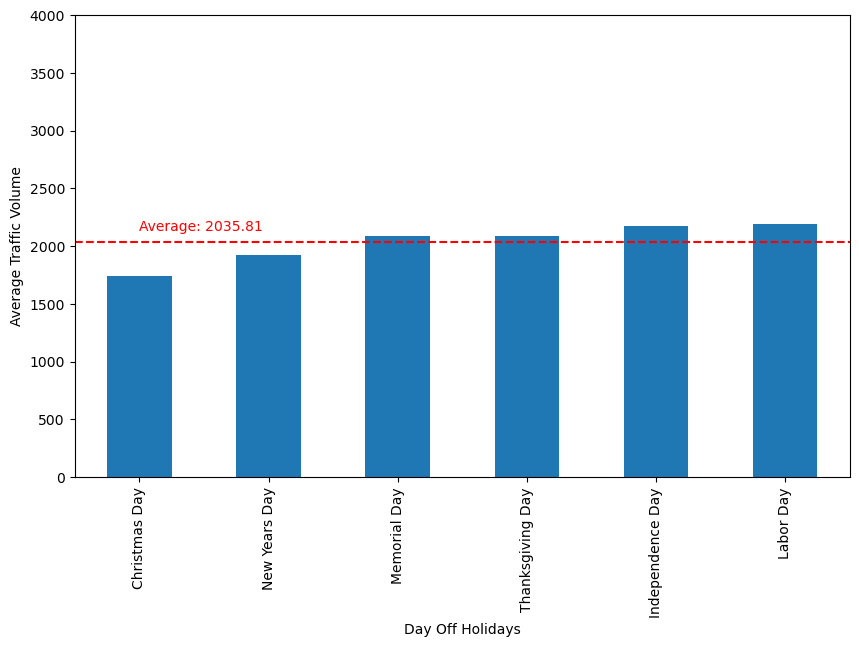

In [42]:
# Sort the core_holiday_average DataFrame by traffic volume
core_holiday_avg_traffic_sorted = core_holiday_avg_traffic.sort_values()
core_holiday_avg_traffic_sorted.plot(kind='bar', figsize=(10, 6), ylabel='Average Traffic Volume', xlabel='Core Holidays', ylim=(0, 4000))


# Calculate the overall average traffic volume for core holidays
overall_average_traffic_core_holidays = core_holiday_avg_traffic.mean()

# Plot the average traffic volume for core holidays
ax = core_holiday_avg_traffic_sorted.plot(kind='bar', figsize=(10, 6), ylabel='Average Traffic Volume', xlabel='Day Off Holidays', ylim=(0, 4000))

# Draw a horizontal line indicating the overall average traffic volume for core holidays
ax.axhline(y=overall_average_traffic_core_holidays, color='r', linestyle='--')

# Add a text label to the horizontal line
ax.text(0, overall_average_traffic_core_holidays + 100, f'Average: {overall_average_traffic_core_holidays:.2f}', color='r')

Text(0, 3177.860426074635, 'Average: 3077.86')

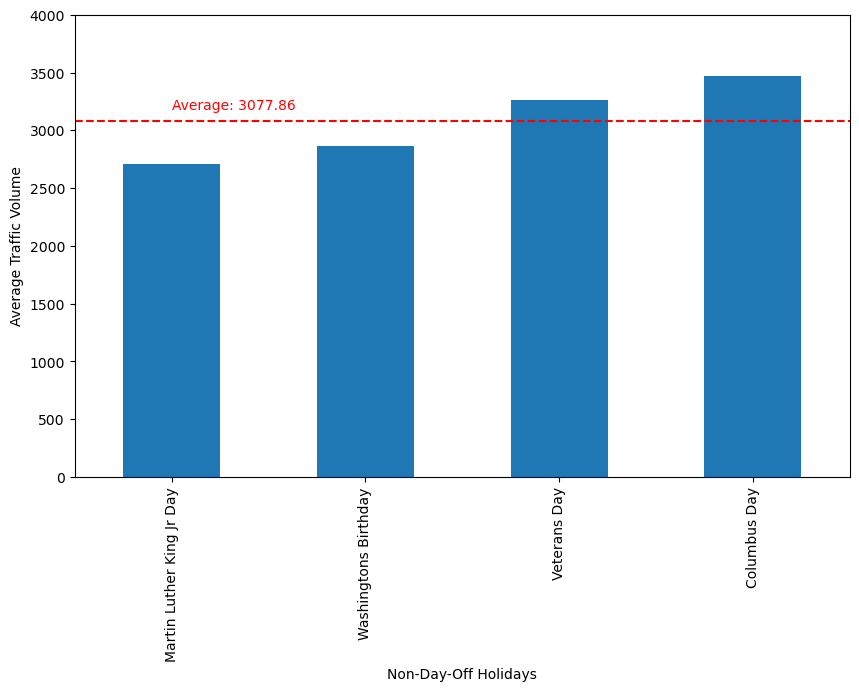

In [41]:
other_holidays = ['Martin Luther King Jr Day', 'Washingtons Birthday', 'Veterans Day', 'Columbus Day']
other_holidays_data = df[df['holiday'].isin(other_holidays)]
other_holidays_avg_traffic = other_holidays_data.groupby('holiday')['traffic_volume'].mean()
other_holidays_avg_traffic_sorted = other_holidays_avg_traffic.sort_values()
other_holidays_avg_traffic_sorted.plot(kind='bar', figsize=(10, 6), ylabel='Average Traffic Volume', xlabel='Non-Day-Off Holidays', ylim=(0, 4000))

# Calculate the overall average traffic volume for core holidays
overall_other_holidays_average = other_holidays_avg_traffic_sorted.mean()

ax = other_holidays_avg_traffic_sorted.plot(kind='bar', figsize=(10, 6), ylabel='Average Traffic Volume', xlabel='Non-Day-Off Holidays', ylim=(0, 4000))

# Draw a horizontal line indicating the overall average traffic volume for core holidays
ax.axhline(y=overall_other_holidays_average, color='r', linestyle='--')

# Add a text label to the horizontal line
ax.text(0, overall_other_holidays_average + 100, f'Average: {overall_other_holidays_average:.2f}', color='r')
